In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

## loading data to the notebook

In [2]:
data=pd.read_csv("AB_NYC_2019.csv")

## Looking for top 5 column of our dataset

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# size of our data

In [4]:
data.size

782320

## some important information about the columns of our data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## some statistical information about the data:

In [6]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Null values in each column:

In [7]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# data preprocessing :

## data cleaning:

In [8]:
#dropping the unnecessary columns:
data.drop(['id','last_review'],axis=1,inplace=True)

In [9]:
#lokking for filterd data:
data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [10]:
#replacing the null values in the column review per month:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

In [11]:
data.isnull().sum()

name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [12]:
#checking for duplicate rows:
data.duplicated().sum()

0

# some important information about our data:

## number of unique Airbnb

In [13]:
data['name'].value_counts().size

47905

# number of different neighbourhood group along with their occurrence:

In [14]:
data["neighbourhood_group"].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

## checking for correlation between the numerical columns:

In [15]:
# corr = data.corr()
# corr
# Select only the numerical columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_data.corr()
print(corr)

                                 host_id  latitude  longitude     price  \
host_id                         1.000000  0.020224   0.127055  0.015309   
latitude                        0.020224  1.000000   0.084788  0.033939   
longitude                       0.127055  0.084788   1.000000 -0.150019   
price                           0.015309  0.033939  -0.150019  1.000000   
minimum_nights                 -0.017364  0.024869  -0.062747  0.042799   
number_of_reviews              -0.140106 -0.015389   0.059094 -0.047954   
reviews_per_month               0.209783 -0.018758   0.138516 -0.050564   
calculated_host_listings_count  0.154950  0.019517  -0.114713  0.057472   
availability_365                0.203492 -0.010983   0.082731  0.081829   

                                minimum_nights  number_of_reviews  \
host_id                              -0.017364          -0.140106   
latitude                              0.024869          -0.015389   
longitude                            -0.06

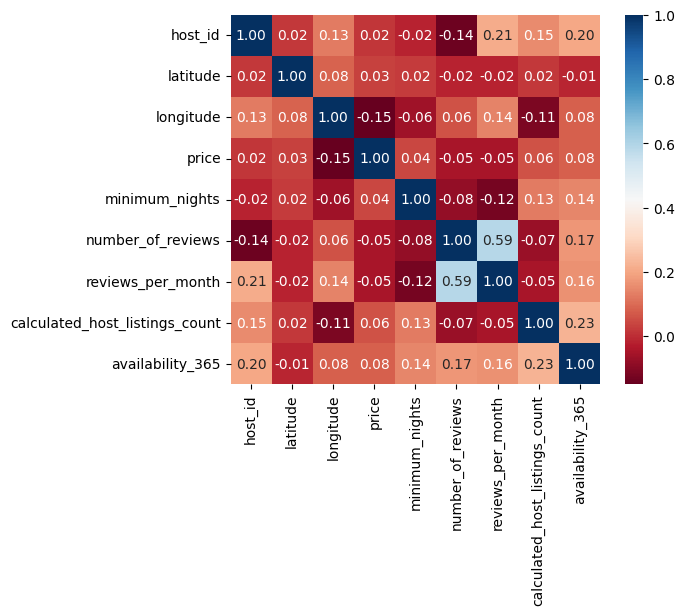

In [16]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)
plt.show()

# DATA ANALYSIS :

# 1.Highest number of apartment owned by host:

In [17]:
data['host_name'].value_counts().sort_values(ascending=False)

host_name
Michael             417
David               403
Sonder (NYC)        327
John                294
Alex                279
                   ... 
Martin & Soledad      1
Soheil                1
Keno                  1
Keagon                1
Ilgar & Aysel         1
Name: count, Length: 11452, dtype: int64

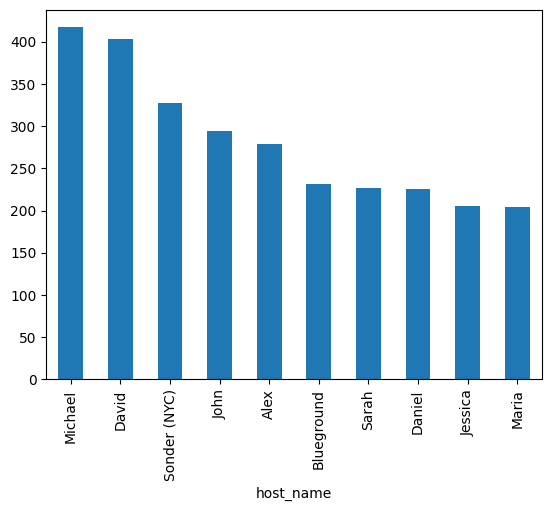

In [18]:
#vizualization by bar plot:
data['host_name'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

### according to our above vizualization Michael has highest number of appartments,but as we know "name" is not unique let's cheack by 'ID'

In [19]:
data['host_id'].value_counts().sort_values(ascending=False)

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
271916367      1
271928929      1
271925782      1
242376689      1
68119814       1
Name: count, Length: 37457, dtype: int64

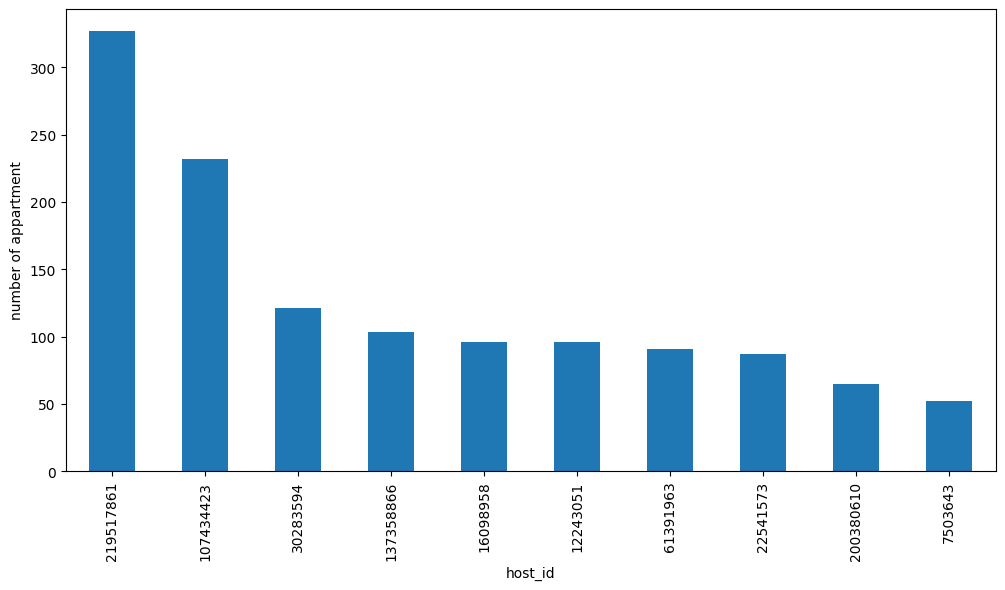

In [20]:
#vizualization by bar plot:
fig=plt.figure(figsize=(12,6))
plt.xlabel("id")
plt.ylabel("number of appartment")

data['host_id'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

### so the host with the id -219517861 has the highest number of appartment. Now we will scarch the name of the host holding the id-219517861

In [21]:
data[data["host_id"]==219517861]['host_name'].unique()[0]

'Sonder (NYC)'

### so Sonder (NYC) has the highest number of appartment

# 2.who are top earner:

In [22]:
top_earners=data.groupby(['name'])['price'].mean().reset_index().sort_values(by='price',ascending=False)
top_earners=top_earners[0:20]
top_earners

,name,price
19867,Furnished room in Astoria apartment,10000.0
26757,Luxury 1 bedroom apt. -stunning Manhattan views,10000.0
1107,1-BR Lincoln Center,10000.0
35502,"Quiet, Clean, Lit @ LES & Chinatown",9999.0
2213,2br - The Heart of NYC: Manhattans Lower East ...,9999.0
40316,Spanish Harlem Apt,9999.0
7017,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,8500.0
19384,Film Location,8000.0
18041,East 72nd Townhouse by (Hidden by Airbnb),7703.0
20109,Gem of east Flatbush,7500.0


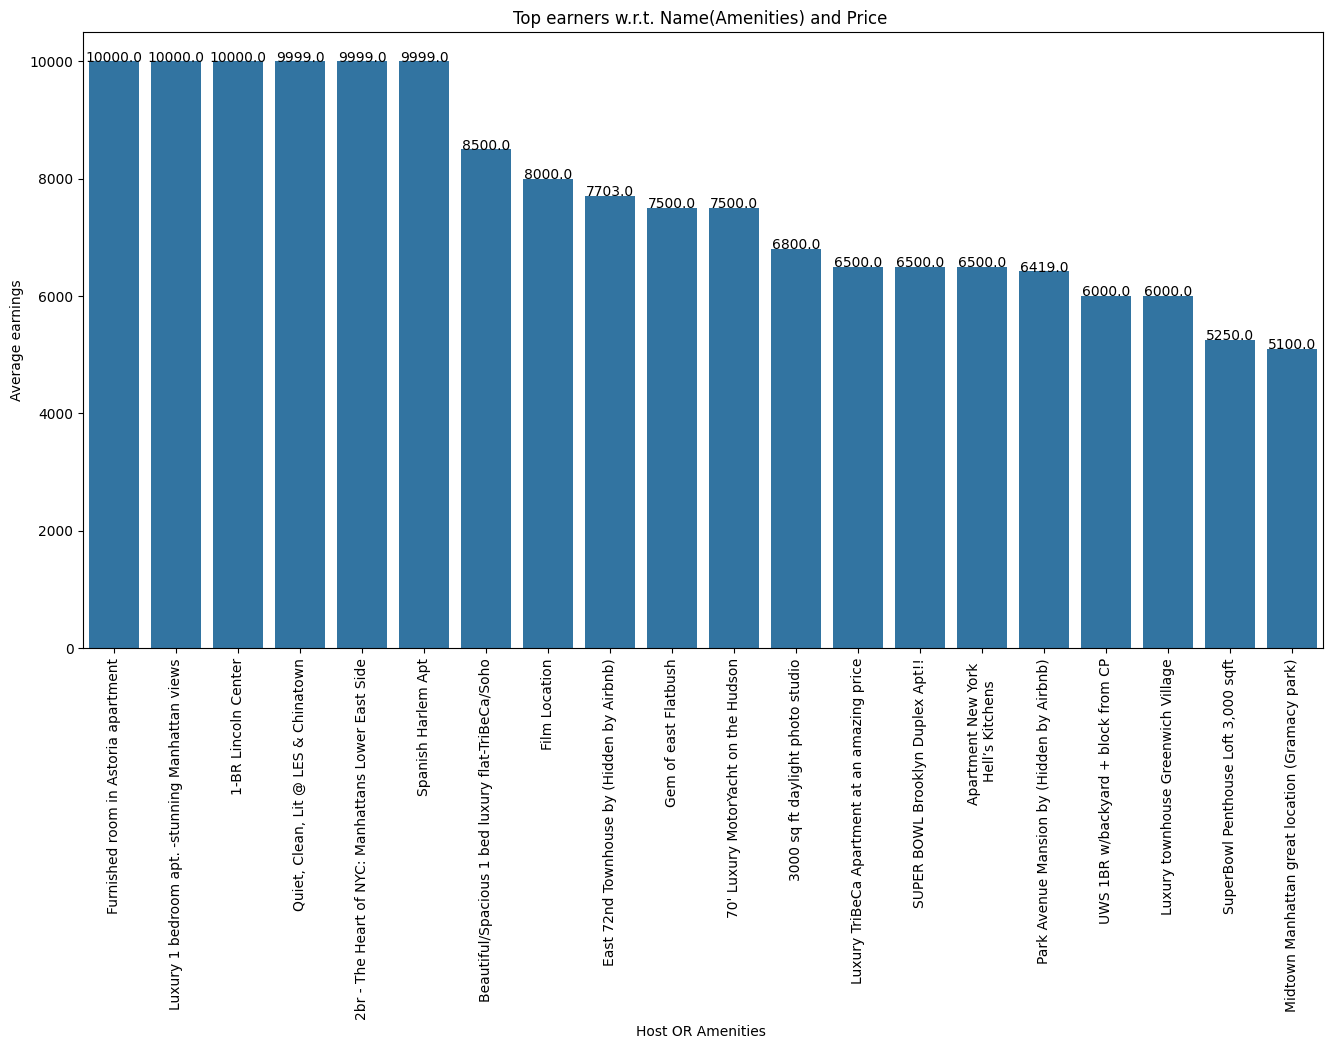

In [23]:
#vizualization
plt.figure(figsize=(16,8))
sns.barplot(x='name',y='price',data=top_earners)

plt.xticks(rotation=90)

for i,j in enumerate(top_earners['price']):
    plt.text(x=i,y=j,s=f'{j}',ha='center')
    
plt.title("Top earners w.r.t. Name(Amenities) and Price ")
plt.xlabel("Host OR Amenities ")
plt.ylabel("Average earnings")
plt.show()

## conclusion:

### there are three top earner Furnished room in Astoria apartment,Luxury 1 bedroom apt. -stunning Manhattan views,1-BR Lincoln Center with earning $1000

# 3.top 10 neighbourhood having highest number of apartments.

In [24]:
# top neighbourhood group having maximum number of listing:
data['neighbourhood_group'].value_counts().sort_values(ascending=False).head(10)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

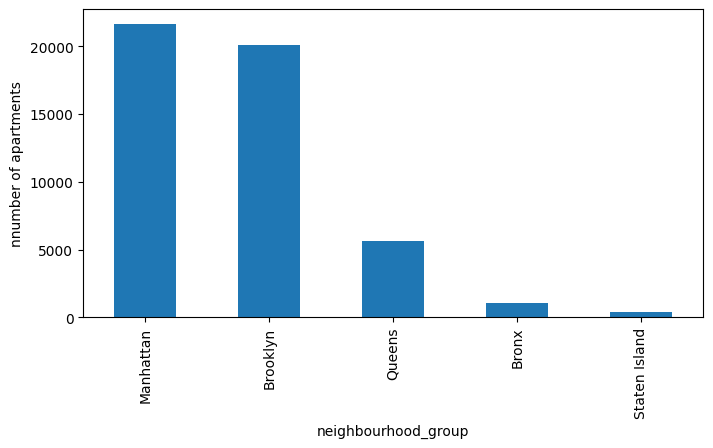

In [25]:
# vizualization by bar plot
fig=plt.figure(figsize=(8,4))
plt.xlabel("neighbourhood_group")
plt.ylabel("nnumber of apartments")

data['neighbourhood_group'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

### Manhattan neighbourhood group  has highest number of apartments

In [26]:
# neighbourhood having maximum number of listing:
data['neighbourhood'].value_counts().sort_values(ascending=False).head(10)

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: count, dtype: int64

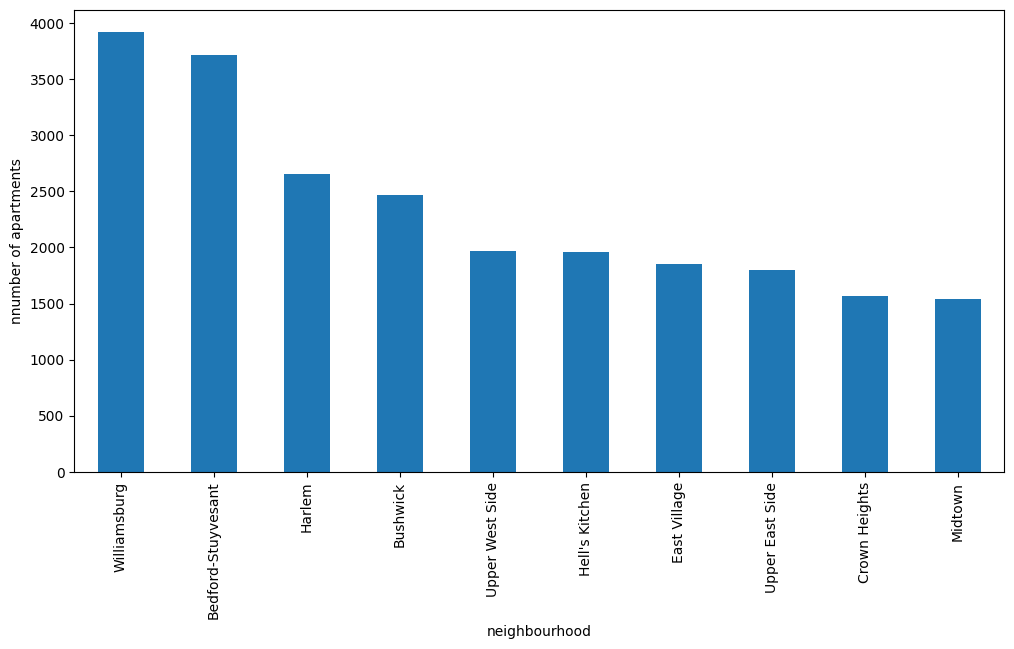

In [27]:
#vizualization by bar plot
fig=plt.figure(figsize=(12,6))
plt.xlabel("neighbourhood")
plt.ylabel("nnumber of apartments")

data['neighbourhood'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

### "Williamsburg" in 'neighbourhood' has maximum number of listing

# 4.Top 3 neighbourhood having maximum price in each neighbourhood group

In [28]:
# distinct neighbourhood_groups:
M=data['neighbourhood_group'].value_counts()
M

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

### There is total 5 types of neighbourhood_groups

In [29]:
group=data.groupby('neighbourhood_group')

### for the group Manhattan 

In [30]:
Manhattan=group.get_group('Manhattan')[['neighbourhood','price']].sort_values('price',ascending=False).head(3)
Manhattan

,neighbourhood,price
29238,Upper West Side,10000
12342,Lower East Side,9999
40433,Lower East Side,9999


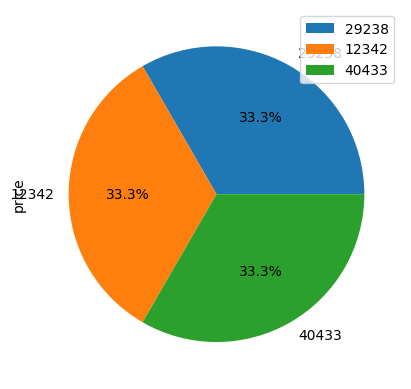

In [31]:
#vizualization:
Manhattan.plot(kind='pie',y='price',autopct='%1.1f%%')
plt.show()

### for the group Brooklyn

In [32]:
Brooklyn=group.get_group('Brooklyn')[['neighbourhood','price']].sort_values('price',ascending=False).head(3)
Brooklyn

,neighbourhood,price
17692,Greenpoint,10000
4377,Clinton Hill,8000
45666,East Flatbush,7500


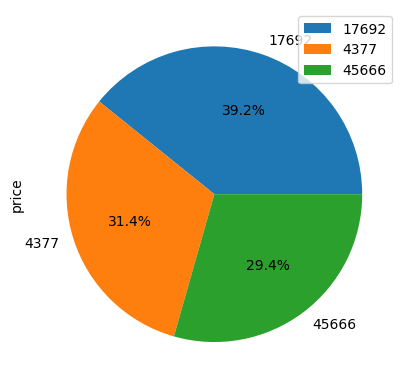

In [33]:
Brooklyn.plot(kind='pie',y='price',autopct='%1.1f%%')
plt.show()

### for the group Queens 

In [34]:
#for the group Queens 
Queens=group.get_group('Queens')[['neighbourhood','price']].sort_values('price',ascending=False).head(3)
Queens 

,neighbourhood,price
9151,Astoria,10000
42680,Bayside,2600
17811,Forest Hills,2350


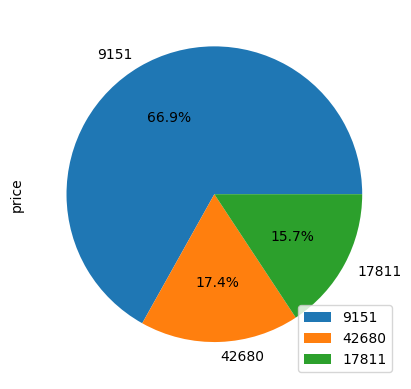

In [35]:
Queens.plot(kind='pie',y='price',autopct='%1.1f%%')
plt.show()

### for the group Bronx

In [36]:
Bronx=group.get_group('Bronx')[['neighbourhood','price']].sort_values('price',ascending=False).head(3)
Bronx 

,neighbourhood,price
24477,Riverdale,2500
48282,City Island,1000
25422,Riverdale,800


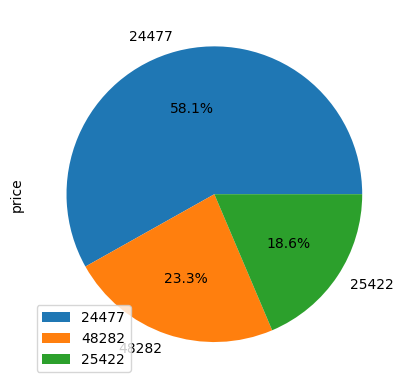

In [37]:
Bronx.plot(kind='pie',y='price',autopct='%1.1f%%')
plt.show()

### for the group Staten Island

In [38]:
Bronx=group.get_group('Staten Island')[['neighbourhood','price']].sort_values('price',ascending=False).head(3)
Bronx 

,neighbourhood,price
22353,Randall Manor,5000
45572,Prince's Bay,1250
6333,St. George,1000


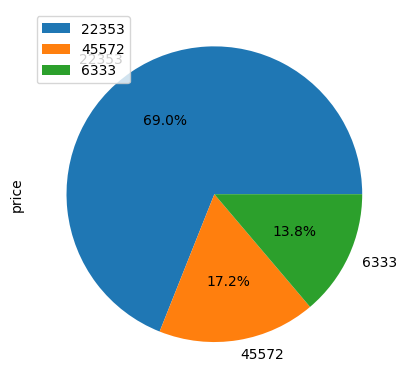

In [39]:
Bronx.plot(kind='pie',y='price',autopct='%1.1f%%')
plt.show()

# 5.let's see which kind of room is more common in the New York City Airbnb.

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64


room_type
Entire home/apt    51.97
Private room       45.66
Shared room         2.37
Name: proportion, dtype: float64




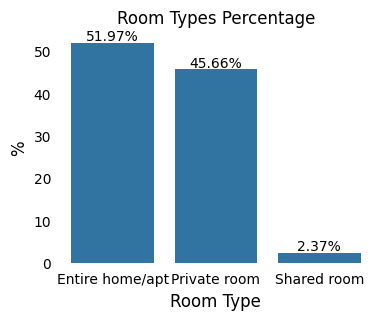

In [80]:
# Calculating the number of rooms for each room type
room_type = data['room_type'].value_counts().sort_values(ascending=False)

# Calculating the percentage of rooms for each room type
room_type_pct = round(data['room_type'].value_counts(normalize=True)  * 100, 2)

# Displaying the results
print(room_type)
print('\n')
print(room_type_pct)
print('\n')

# Plotting the percentage of rooms for each room type
plt.figure(figsize=(4, 3))
ax = sns.barplot(x=room_type_pct.index, y=room_type_pct.values)

# Adding labels and title
ax.set_title('Room Types Percentage')
ax.set_ylabel('%', fontsize=12)
ax.set_xlabel('Room Type', fontsize=12)
ax.tick_params(bottom=False, top=False, left=False, right=False)

# Removing the spines
for _, spine in ax.spines.items():
    spine.set_visible(False)

# Displaying the percentages on top of each bar
for i, pct in enumerate(room_type_pct.values):
    ax.text(i, pct + 0.5, f'{pct}%', ha='center', fontsize=10)

plt.show()

### Entire apartments and private rooms dominate the Airbnb market in New York City. Hotel rooms are basically nonexistent

# 6.let's see how many rooms are available in each region.

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


neighbourhood_group
Manhattan        44.30
Brooklyn         41.12
Queens           11.59
Bronx             2.23
Staten Island     0.76
Name: count, dtype: float64




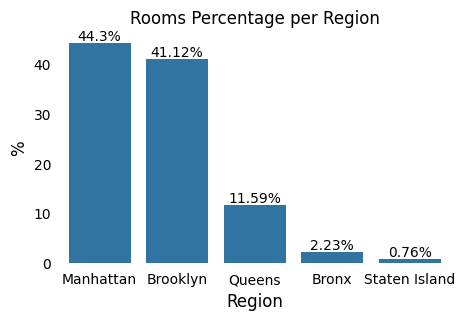

In [78]:
# Calculating the number of rooms per region
room_regions = data['neighbourhood_group'].value_counts().sort_values(ascending=False)

# Calculating the percentage of rooms per region
room_regions_pct = round(data['neighbourhood_group'].value_counts().sort_values(ascending=False) / len(data) * 100, 2)

# Displaying the results
print(room_regions)
print('\n')
print(room_regions_pct)
print('\n')

# Plotting the percentage of rooms per region
plt.figure(figsize=(5, 3))
ax = sns.barplot(x=room_regions_pct.index, y=room_regions_pct.values)

# Adding labels and title
ax.set_title('Rooms Percentage per Region')
ax.set_ylabel('%', fontsize=12)
ax.set_xlabel('Region', fontsize=12)
ax.tick_params(bottom=False, top=False, left=False, right=False)

# Removing the spines
for _, spine in ax.spines.items():
    spine.set_visible(False)

# Displaying the percentages on top of each bar
for i, pct in enumerate(room_regions_pct.values):
    ax.text(i, pct + 0.5, f'{pct}%', ha='center', fontsize=10)

plt.show()


### Despite having the two highest average prices, the Manhattan and Brooklyn regions also have the biggest number of rooms on Airbnb. We can then conclude that those are the most expensive and most requested regions. 

# 7. Top reviewed neighbourhood

In [42]:
group_nbd=data.groupby("neighbourhood")

In [43]:
group['number_of_reviews'].mean().sort_values(ascending=False)

neighbourhood_group
Staten Island    30.941019
Queens           27.700318
Bronx            26.004583
Brooklyn         24.202845
Manhattan        20.985596
Name: number_of_reviews, dtype: float64

Text(0.5, 0, 'neighbourhood group')

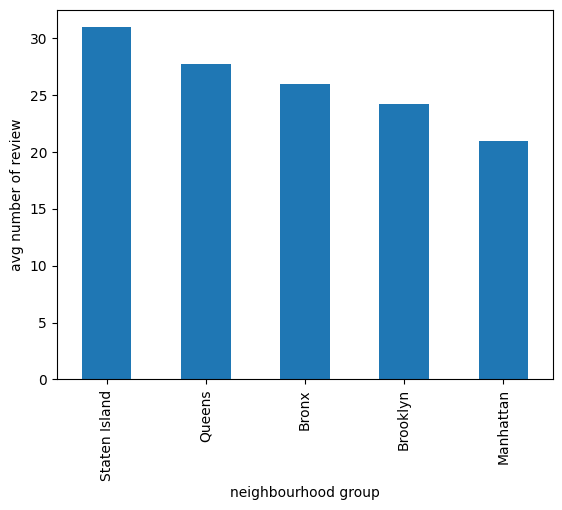

In [44]:
group['number_of_reviews'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel("avg number of review")
plt.xlabel("neighbourhood group")

### The region Staten Island has maximum number of review.

# 8 Do surrounding Airbnb listings impact a property's rental price in New York City?

## our aim is to create a new column in our dataframe which will contain the average price of neighbourhood Airbnbs of each Airbnbs (latitude and longitude wise)

<Axes: xlabel='latitude', ylabel='longitude'>

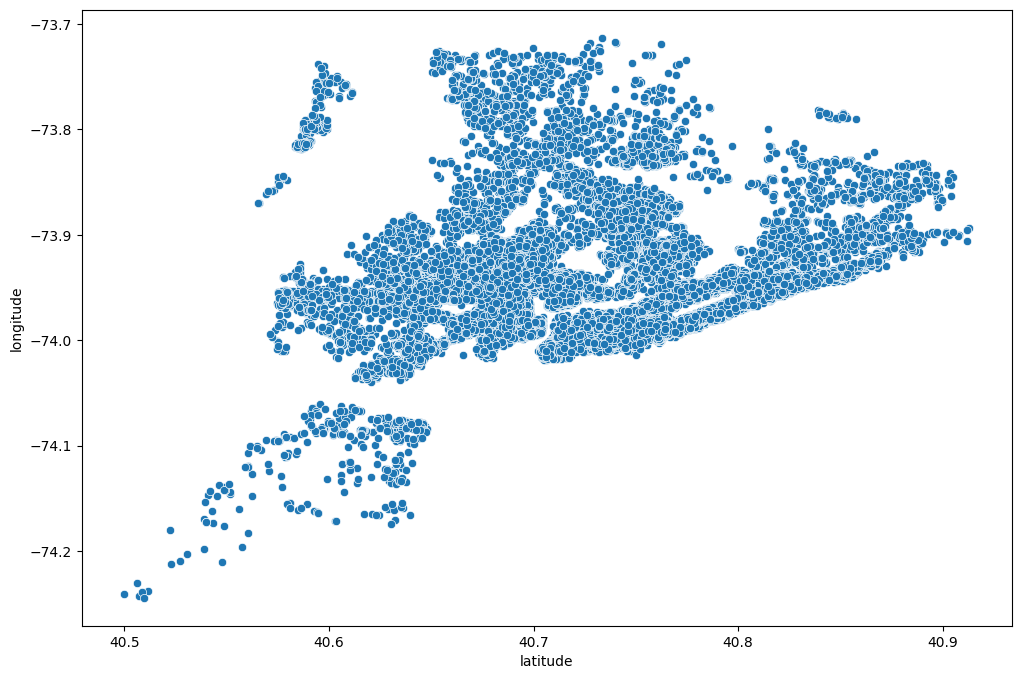

In [77]:
#we are drawing the scatter plot of latitude and longitude
fig=plt.figure(figsize=(12,8))
sns.scatterplot(x=data['latitude'],y=data['longitude'])

### now will create a new column of tuple like (latitude,longitude)

In [46]:
data_lat_long=data[['latitude','longitude']]
data_lat_long.reset_index(inplace=True)
data_lat_long.head()

,index,latitude,longitude
0,0,40.64749,-73.97237
1,1,40.75362,-73.98377
2,2,40.80902,-73.94190
3,3,40.68514,-73.95976
4,4,40.79851,-73.94399


In [72]:
#making a list of tuple
list_lat_long=[]
latitude_list=list(data['latitude'])
longitude_list=list(data['longitude'])
for i in range (len(data_lat_long)):
    list_lat_long.append((latitude_list[i],longitude_list[i]))
list_lat_long

[(40.64749, -73.97237),
 (40.75362, -73.98377),
 (40.80902, -73.9419),
 (40.68514, -73.95976),
 (40.79851, -73.94399),
 (40.74767, -73.975),
 (40.68688, -73.95596),
 (40.76489, -73.98493),
 (40.80178, -73.96723),
 (40.71344, -73.99037),
 (40.80316, -73.96545),
 (40.76076, -73.98867),
 (40.66829, -73.98779),
 (40.79826, -73.96113),
 (40.7353, -74.00525),
 (40.70837, -73.95352),
 (40.69169, -73.97185),
 (40.74192, -73.99501),
 (40.67592, -73.94694),
 (40.79685, -73.94872),
 (40.71842, -73.95718),
 (40.68069, -73.97706),
 (40.67989, -73.97798),
 (40.68001, -73.97865),
 (40.68371, -73.94028),
 (40.65599, -73.97519),
 (40.86754, -73.92639),
 (40.76715, -73.98533),
 (40.86482, -73.92106),
 (40.7292, -73.98542),
 (40.82245, -73.95104),
 (40.81305, -73.95466),
 (40.72219, -73.93762),
 (40.8213, -73.95318),
 (40.6831, -73.95473),
 (40.66869, -73.9878),
 (40.68876, -73.94312),
 (40.70186, -73.92745),
 (40.63702, -73.96327),
 (40.71401, -73.98917),
 (40.7229, -73.98199),
 (40.66278, -73.97966),
 

## adding the resulting list to our data frame:

In [48]:
data['list_lat_long']=list_lat_long

In [49]:
#data preview
data.head(5)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,list_lat_long
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,"(40.64749, -73.97237)"
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,"(40.75362, -73.98377)"
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,"(40.80902, -73.9419)"
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,"(40.68514, -73.95976)"
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,"(40.79851, -73.94399)"


## we have created a dictionary whose key is (latitude,longitude) and value is price 

In [71]:
price_dict1=data[['list_lat_long','price']].set_index('list_lat_long').to_dict()
price_dict=price_dict1['price']
price_dict

{(40.64749, -73.97237): 149,
 (40.75362, -73.98377): 225,
 (40.80902, -73.9419): 150,
 (40.68514, -73.95976): 89,
 (40.79851, -73.94399): 80,
 (40.74767, -73.975): 200,
 (40.68688, -73.95596): 60,
 (40.76489, -73.98493): 79,
 (40.80178, -73.96723): 79,
 (40.71344, -73.99037): 150,
 (40.80316, -73.96545): 135,
 (40.76076, -73.98867): 85,
 (40.66829, -73.98779): 89,
 (40.79826, -73.96113): 85,
 (40.7353, -74.00525): 120,
 (40.70837, -73.95352): 140,
 (40.69169, -73.97185): 215,
 (40.74192, -73.99501): 140,
 (40.67592, -73.94694): 99,
 (40.79685, -73.94872): 190,
 (40.71842, -73.95718): 299,
 (40.68069, -73.97706): 130,
 (40.67989, -73.97798): 80,
 (40.68001, -73.97865): 110,
 (40.68371, -73.94028): 120,
 (40.65599, -73.97519): 60,
 (40.86754, -73.92639): 80,
 (40.76715, -73.98533): 150,
 (40.86482, -73.92106): 44,
 (40.7292, -73.98542): 180,
 (40.82245, -73.95104): 50,
 (40.81305, -73.95466): 52,
 (40.72219, -73.93762): 55,
 (40.8213, -73.95318): 50,
 (40.6831, -73.95473): 70,
 (40.66869

## applying NearestNeighbors algo for finding nearest 3 Airbnb's average price  

In [67]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

def find_three_closest_points(points, k=4):
    # Convert the list of points to a numpy array
    X = np.array(points)

    # Create a NearestNeighbors object and fit it to the data
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(X)

    # Find the distances and indices of the k nearest neighbors for each point
    distances, indices = nbrs.kneighbors(X)

    # Create a dictionary to store the results
    closest_points_dict = {}

    # Loop through each point and store its three closest neighbors' average price
    for i, point in enumerate(points):
        # Use the built-in sum() function instead of np.sum()
        avg_price = sum(price_dict[tuple(X[idx])] for idx in indices[i][1:]) / 3
        closest_points_dict[tuple(point)] = avg_price

    return closest_points_dict

# Example usage
avg_price_list = list(find_three_closest_points(list(price_dict.keys())).values())
avg_price_list


[81.66666666666667,
 889.0,
 366.6666666666667,
 101.66666666666667,
 175.0,
 257.6666666666667,
 92.66666666666667,
 187.33333333333334,
 93.0,
 68.33333333333333,
 75.0,
 294.6666666666667,
 114.33333333333333,
 190.0,
 209.66666666666666,
 206.0,
 70.66666666666667,
 310.3333333333333,
 146.66666666666666,
 136.66666666666666,
 123.33333333333333,
 136.66666666666666,
 261.6666666666667,
 165.0,
 91.66666666666667,
 142.66666666666666,
 84.66666666666667,
 207.33333333333334,
 71.66666666666667,
 159.66666666666666,
 76.66666666666667,
 55.666666666666664,
 85.0,
 56.0,
 73.66666666666667,
 129.66666666666666,
 97.66666666666667,
 119.0,
 52.0,
 80.33333333333333,
 201.66666666666666,
 185.0,
 72.66666666666667,
 227.33333333333334,
 108.33333333333333,
 100.0,
 165.0,
 102.33333333333333,
 104.33333333333333,
 126.66666666666667,
 112.0,
 94.0,
 106.33333333333333,
 121.66666666666667,
 313.0,
 65.0,
 220.66666666666666,
 106.33333333333333,
 158.33333333333334,
 174.33333333333334

## adding the new column in our data set: 'avg_price_of_nearby_airbnb'

In [68]:
data["avg_price_of_nearby_airbnb"]=pd.Series(avg_price_list)

In [69]:
data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,list_lat_long,avg_price_of_nearby_airbnb
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,"(40.64749, -73.97237)",81.666667
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,"(40.75362, -73.98377)",889.000000
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,"(40.80902, -73.9419)",366.666667
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,"(40.68514, -73.95976)",101.666667
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,"(40.79851, -73.94399)",175.000000


## cheacking the correlation between price of a Airbnb and its neighbourhood Airbnbs

In [70]:
data['price'].corr(data['avg_price_of_nearby_airbnb'])

0.036574441532527605

# conclusion:

# correlation is not so high so they are not dependent. surrounding Airbnb listings does not impact a property's rental price in New York City.